# 연습문제
1. csv폴더 안에 있는 drinks.csv 파일 로드 
2. 데이터프레임의 정보를 출력
3. 컬럼별 결측치의 개수를 확인
4. continent 컬럼에 결측치가 존재 -> 결측치를 'OT' 문자열로 대체
5. 컬럼명 변경 = ['국가', '맥주 소비량', '위스키 소비량', '와인 소비량', '리터당 알콜 농도', '대륙']
6. 대륙을 기준으로 그룹화한 뒤 위스키 소비량의 평균 값을 출력

In [ ]:
import pandas as pd

In [ ]:
# drinks.csv 파일 로드 
drinks = pd.read_csv('../csv/drinks.csv')
drinks.head(2)

In [ ]:
df = drinks.copy()

In [ ]:
# 데이터프레임의 정보 출력
df.info()

In [ ]:
# 컬럼별 결측치의 수를 출력
df.isna().sum()

In [ ]:
# continent 컬럼의 결측치를 'OT' 대체
df['continent'] = df['continent'].fillna('OT')

In [ ]:
# 컬럼의 이름을 변경
df.columns = ['국가', '맥주 소비량', '위스키 소비량', '와인 소비량', '리터당 알콜 농도', '대륙']
df.head(1)

In [ ]:
# 대륙별 위스키의 평균량 출력
df[['대륙', '위스키 소비량']].groupby('대륙').mean()

In [ ]:
# 대륙별 위스키 소비량의 평균, 최소, 최대, 합계를 출력
group_data = df[['대륙', '위스키 소비량']].groupby('대륙').agg(['mean', 'min', 'max', 'sum'])

In [ ]:
group_data

In [ ]:
dict = {
    '위스키 소비량' : {
        'mean' : 10, 
        'min' : 0, 
        'max' : 50, 
        'sum' : 100
    }
}

In [ ]:
print(dict['위스키 소비량']['max'])

In [ ]:
group_data['위스키 소비량']['mean']

1. 리터당 알콜 농도 컬럼의 평균 값보다 높은 대륙들은 어디인가?
2. 국가별 술 소비량 대비 알콜 비율 이라는 새로운 컬럼을 추가 
    - 총 술 소비량 컬럼 생성
    - (리터당 알콜 농도 / 총 술 소비량) * 100 -> 국가별 술 소비량 대비 알콜 비율
    - 결측치가 나온다면 0으로 대체
3. 가장 독한 술을 먹는 나라는 어디인가?
4. 우리 나라는 그 중에 몇 위인가?

In [ ]:
# 리터당 알콜 농도의 평균 값을 출력
total_mean = df['리터당 알콜 농도'].mean()

In [ ]:
# 대륙별 리터당 알콜 농도의 평균 데이터를 출력
group_data2 = df[['대륙', '리터당 알콜 농도']].groupby('대륙').mean()

In [ ]:
# group_data2에서 total_mean보다 높은 데이터만 출력
group_data2.loc[group_data2['리터당 알콜 농도'] > total_mean]

In [28]:
# 총 술 소비량 컬럼을 생성
# 맥주 소비량 + 위스키 소비량 + 와인 소비량 -> 총 술 소비량
df['총 술 소비량'] = \
      df['맥주 소비량'] + df['위스키 소비량'] + df['와인 소비량']

In [29]:
df.head(2)

,국가,맥주 소비량,위스키 소비량,와인 소비량,리터당 알콜 농도,대륙,총 술 소비량
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275


In [31]:
# 술 소비량 대비 알콜 비율 컬럼을 생성
# (리터당 알콜 농도 / 총 술 소비량) * 100
# 총 술 소비량이 0인 경우는 결측치로 출력
# 결측치는 0으로 대체
df['술 소비량 대비 알콜 비율'] = \
      (df['리터당 알콜 농도'] / df['총 술 소비량']) * 100

In [ ]:
df.isna().sum()

In [35]:
# 결측치가 하나의 컬럼에만 존재함으로 해당 컬럼의 결측치를 0으로 채울때
# 스리즈의 형태로 결측치를 채우는 방법, 데이터프레임에 결측치를 채우는 방법
# 두 방법 모두 사용 가능
df = df.fillna(0)

In [37]:
# 가장 독한술을 먹는 나라는 어디인가?
# df[['국가', '술 소비량 대비 알콜 비율']].max()

국가                 Zimbabwe
술 소비량 대비 알콜 비율    26.666667
dtype: object

In [47]:
# 술 소비량 대비 알콜 비율을 기준으로 내림차순 정렬

# df.sort_values(
#     '술 소비량 대비 알콜 비율', 
#     ascending= False
#     ).reset_index()

df_rank = df.sort_values(
    '술 소비량 대비 알콜 비율', 
    ascending= False, 
    ignore_index= True
    )

In [ ]:
df_rank.head(10)

In [54]:
# 우리 나라('South Korea')의 정보를 출력
# df.loc[행의 조건식, 열의 조건식]
df_rank.loc[
    df_rank['국가'] == "South Korea", '술 소비량 대비 알콜 비율'
    ].values[0]

5.93939393939394

In [50]:
import matplotlib.pyplot as plt

In [51]:
_list = ['a', 'b', 'c', 'd']
# 배열에서 위치를 출력하는 함수 index()
print(_list.index('b'))

1


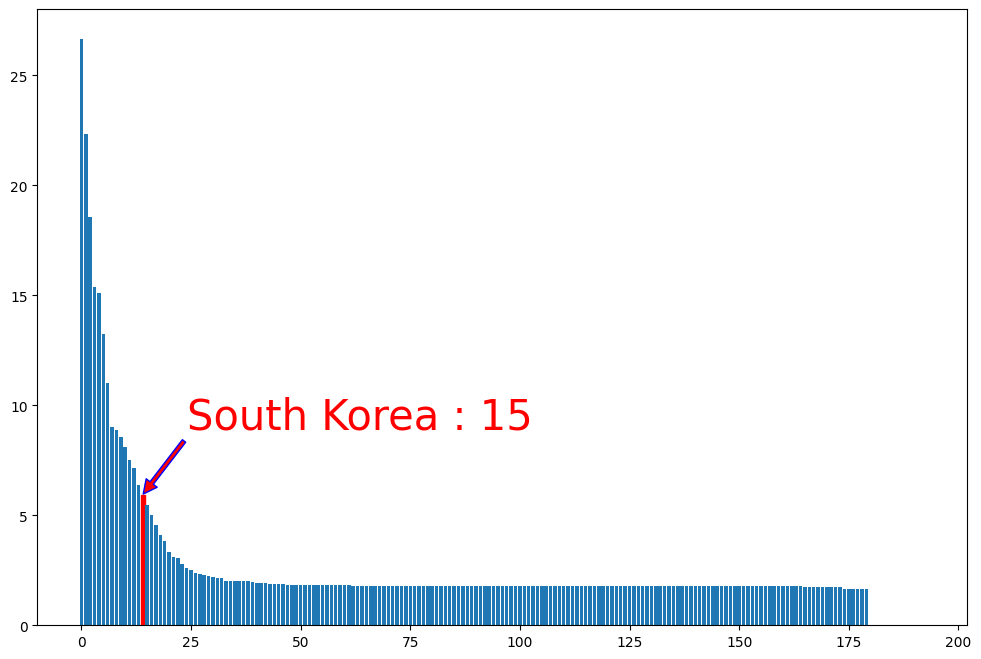

In [79]:
# 시각화 
# 우리나라를 그래프에 표시 
x = list(range(len(df_rank))) # 0 to 192
y = df_rank['술 소비량 대비 알콜 비율']

# 국가 리스트 생성
country_list = df_rank['국가'].tolist()

# 국가 리스트에서 한국의 위치를 출력
korea_rank = country_list.index('South Korea')
# 한국의 술 소비량 대비 알콜 비율 데이터를 변수에 대입
korea_alcohol_rate = df_rank.loc[
    df_rank['국가'] == "South Korea", '술 소비량 대비 알콜 비율'
    ].values[0]

# 그래프 사이즈 변경
plt.figure(figsize=(12, 8))

# 막대 그래프 생성
bar_graph = plt.bar(x, y)

# 한국의 막대의 색을 변경
bar_graph[korea_rank].set_color('r')

# 그래프에 글씨와 화살표를 추가
plt.annotate(
    'South Korea : '+ str(korea_rank + 1), 
    color = 'r',
    fontsize = 30,
    xy = (korea_rank, korea_alcohol_rate),  # 화살표가 가르키는 위치
    xytext = (korea_rank + 10, korea_alcohol_rate + 3), # 텍스트 위치 (화살표의 시작 지점)
    arrowprops = {
        'facecolor' : 'r', # 화살표 내부의 색 지정
        'edgecolor' : 'b',  # 선의 색깔
        'headwidth' : 10, # 화살표 머리의 너비
        'headlength' : 10, # 화살표 머리의 길이
        'width' : 3,        # 화살표의 너비
        'shrink' : 0.01     # 화살표랑 문자의 거리
        }
)

plt.show()